In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('data-export (1).csv')

In [10]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=['channel group','DATE/HOUR', 'USER', 'SESSIONS', 'ENGAGED SESSIONS', 'AVERAGE EPS', 'ES/USER', 'EVENT PER SESSION', 'ENGAGEMEBT RATE', 'EVENT COUNT']           

In [15]:
df.head()

,channel group,DATE/HOUR,USER,SESSIONS,ENGAGED SESSIONS,AVERAGE EPS,ES/USER,EVENT PER SESSION,ENGAGEMEBT RATE,EVENT COUNT
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   channel group      3182 non-null   object
 1   DATE/HOUR          3182 non-null   object
 2   USER               3182 non-null   object
 3   SESSIONS           3182 non-null   object
 4   ENGAGED SESSIONS   3182 non-null   object
 5   AVERAGE EPS        3182 non-null   object
 6   ES/USER            3182 non-null   object
 7   EVENT PER SESSION  3182 non-null   object
 8   ENGAGEMEBT RATE    3182 non-null   object
 9   EVENT COUNT        3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   channel group      3182 non-null   object        
 1   DATE/HOUR          3182 non-null   datetime64[ns]
 2   USER               3182 non-null   int64         
 3   SESSIONS           3182 non-null   int64         
 4   ENGAGED SESSIONS   3182 non-null   int64         
 5   AVERAGE EPS        3182 non-null   float64       
 6   ES/USER            3182 non-null   float64       
 7   EVENT PER SESSION  3182 non-null   float64       
 8   ENGAGEMEBT RATE    3182 non-null   float64       
 9   EVENT COUNT        3182 non-null   int64         
 10  HOUR               3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memory usage: 261.2+ KB


In [59]:
df['DATE/HOUR']=pd.to_datetime(df['DATE/HOUR'],format='%Y%m%d%H', errors='coerce')   #separating the hour column

In [60]:
df.head()

,channel group,DATE/HOUR,USER,SESSIONS,ENGAGED SESSIONS,AVERAGE EPS,ES/USER,EVENT PER SESSION,ENGAGEMEBT RATE,EVENT COUNT,HOUR
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [25]:
numeric_cols = df.columns.drop(['channel group', 'DATE/HOUR'])
df[numeric_cols] =df[numeric_cols].apply(pd.to_numeric,  errors='coerce')
df['HOUR'] = df['DATE/HOUR'].dt.hour    #converting the object into integer value------

In [61]:
df.head()

,channel group,DATE/HOUR,USER,SESSIONS,ENGAGED SESSIONS,AVERAGE EPS,ES/USER,EVENT PER SESSION,ENGAGEMEBT RATE,EVENT COUNT,HOUR
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   channel group      3182 non-null   object        
 1   DATE/HOUR          3182 non-null   datetime64[ns]
 2   USER               3182 non-null   int64         
 3   SESSIONS           3182 non-null   int64         
 4   ENGAGED SESSIONS   3182 non-null   int64         
 5   AVERAGE EPS        3182 non-null   float64       
 6   ES/USER            3182 non-null   float64       
 7   EVENT PER SESSION  3182 non-null   float64       
 8   ENGAGEMEBT RATE    3182 non-null   float64       
 9   EVENT COUNT        3182 non-null   int64         
 10  HOUR               3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memory usage: 261.2+ KB


In [28]:
df.describe()

,DATE/HOUR,USER,SESSIONS,ENGAGED SESSIONS,AVERAGE EPS,ES/USER,EVENT PER SESSION,ENGAGEMEBT RATE,EVENT COUNT,HOUR
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#SESSIONE & USER OVER TIME

In [29]:
sns.set(style='whitegrid')

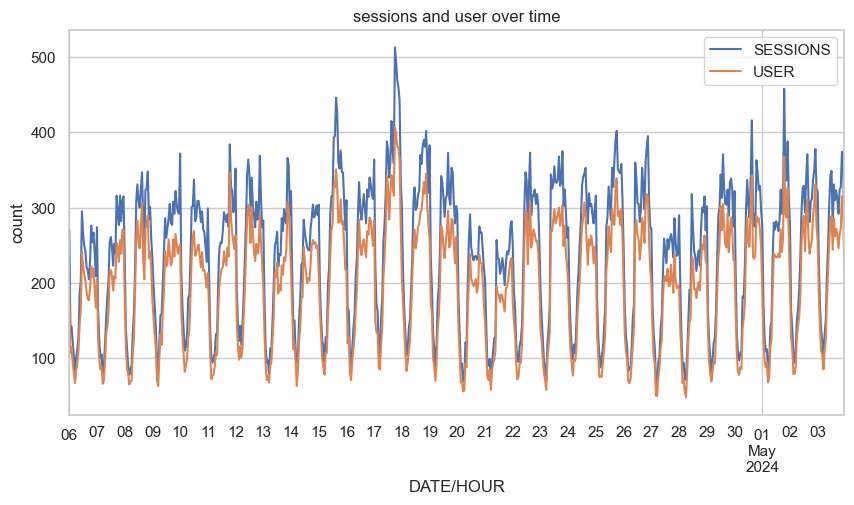

In [37]:
plt.figure(figsize=(10,5))
df.groupby('DATE/HOUR')[['SESSIONS', 'USER']].sum().plot(ax=plt.gca())
plt.title('sessions and user over time')
plt.xlabel('DATE/HOUR')
plt.ylabel('count')
plt.show()

#total user by chanal

/var/folders/g8/bs5qrfqj1qzbj_8c85pxhq5h0000gn/T/ipykernel_3013/1437626143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='channel group', y='USER', estimator=np.sum,palette='viridis')


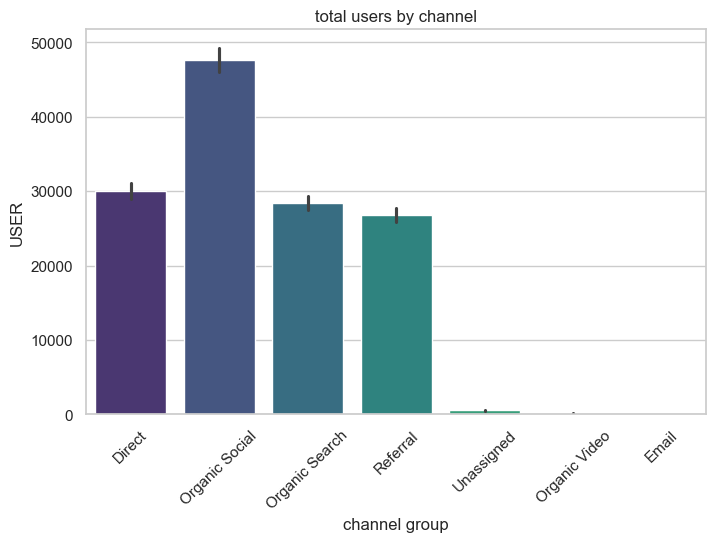

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='channel group', y='USER', estimator=np.sum,palette='viridis')
plt.title('total users by channel')
plt.xticks(rotation=44)
plt.show()

#Average engagement time by channel

/var/folders/g8/bs5qrfqj1qzbj_8c85pxhq5h0000gn/T/ipykernel_3013/3492331056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='channel group', y='AVERAGE EPS', estimator=np.mean, palette='magma')


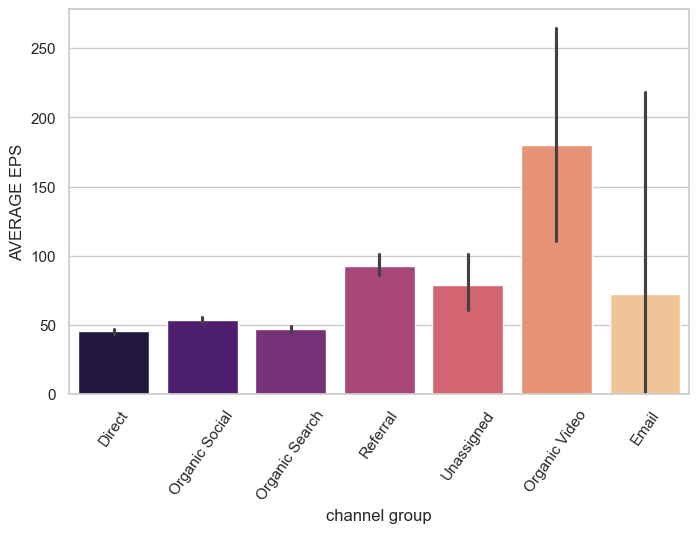

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='channel group', y='AVERAGE EPS', estimator=np.mean, palette='magma')
plt.xticks(rotation=55)
plt.show()

#traffic channels

/var/folders/g8/bs5qrfqj1qzbj_8c85pxhq5h0000gn/T/ipykernel_3013/3157472680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel group', y='ENGAGEMEBT RATE', palette='coolwarm')


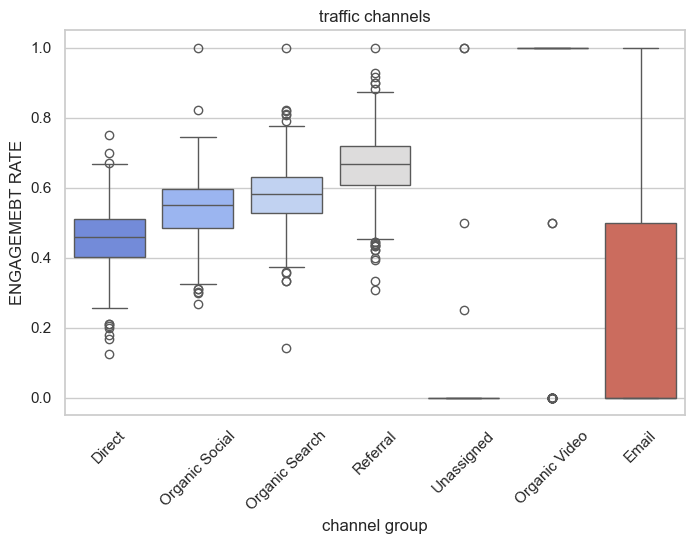

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='channel group', y='ENGAGEMEBT RATE', palette='coolwarm')
plt.title('traffic channels')
plt.xticks(rotation=45)
plt.show()

                                         #traffic time

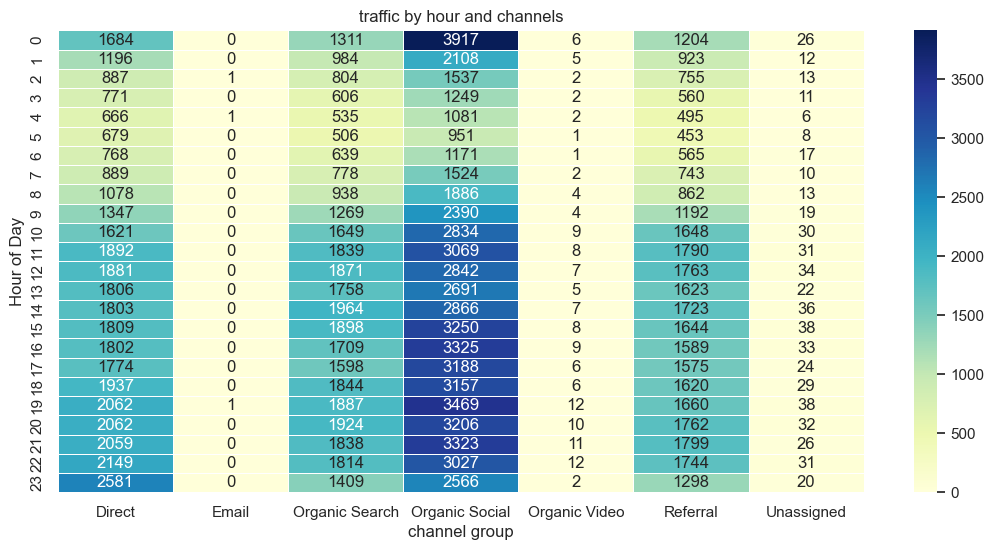

In [55]:
heatmap_dat = df.groupby(['HOUR', 'channel group'])['SESSIONS'].sum().unstack().fillna(0)

plt.figure(figsize=(13, 6))  # Fixed: using tuple (13, 6) instead of 13,6
sns.heatmap(heatmap_dat, cmap='YlGnBu', linewidths=.5, annot=True, fmt='.0f')  # Fixed: variable name and removed space in fmt
plt.title('traffic by hour and channels')
plt.xlabel('channel group')
plt.ylabel('Hour of Day')
plt.show()

                                          #engagement rate vs sessions overtime